Mean Squared Error : 7.605104950071219
Mean Squared Error : 7.657457708347176
Mean Squared Error : 7.762891813389925
Mean Squared Error : 7.852151881874184
Mean Squared Error : 7.690414739285477
Mean Squared Error : 7.691675304119503
Mean Squared Error : 8.702206532375437
Mean Squared Error : 8.68706832736495
Mean Squared Error : 7.680059475052274
Mean Squared Error : 7.699786754812772
Mean Squared Error : 8.565863524327437
Mean Squared Error : 7.988158893554205
Mean Squared Error : 7.875855781871974
Mean Squared Error : 8.708155293580736
Mean Squared Error : 7.992308379106995
Mean Squared Error : 7.88963686448365
Mean Squared Error : 7.78557403423061
Mean Squared Error : 7.686923715612657
Mean Squared Error : 8.671209091883613
Mean Squared Error : 7.989992036495448
Mean Squared Error : 7.855876907825332
Mean Squared Error : 7.804713652674127
Mean Squared Error : 7.832375508307703
Mean Squared Error : 7.96613190594471
Mean Squared Error : 7.7053341034323
Mean Squared Error : 7.88059509

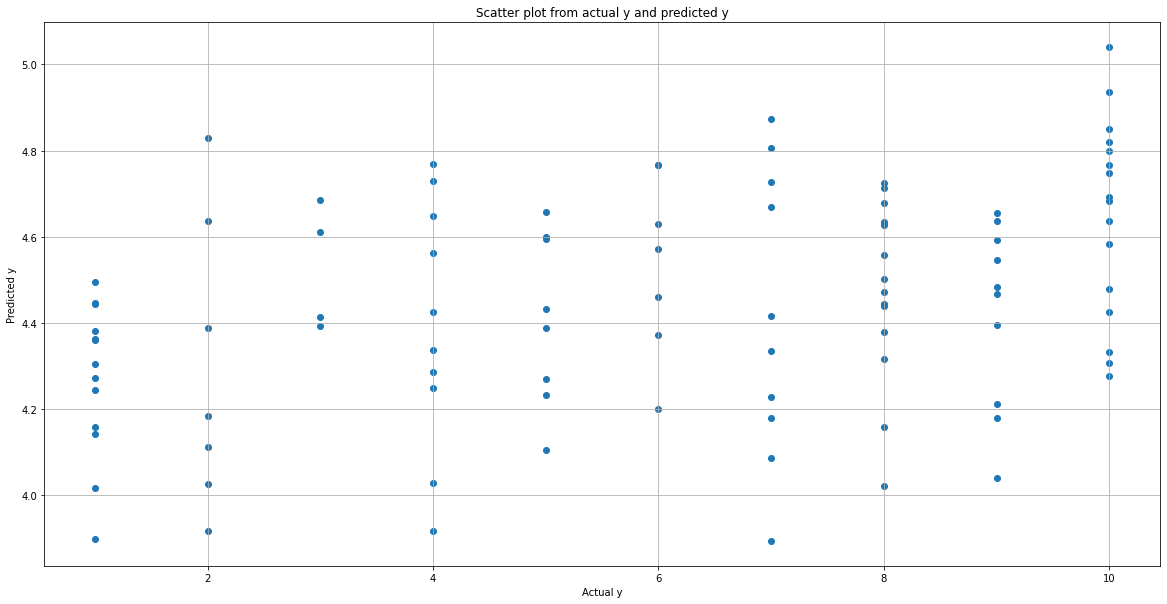

Mean Squared Error : 10.04307091601813


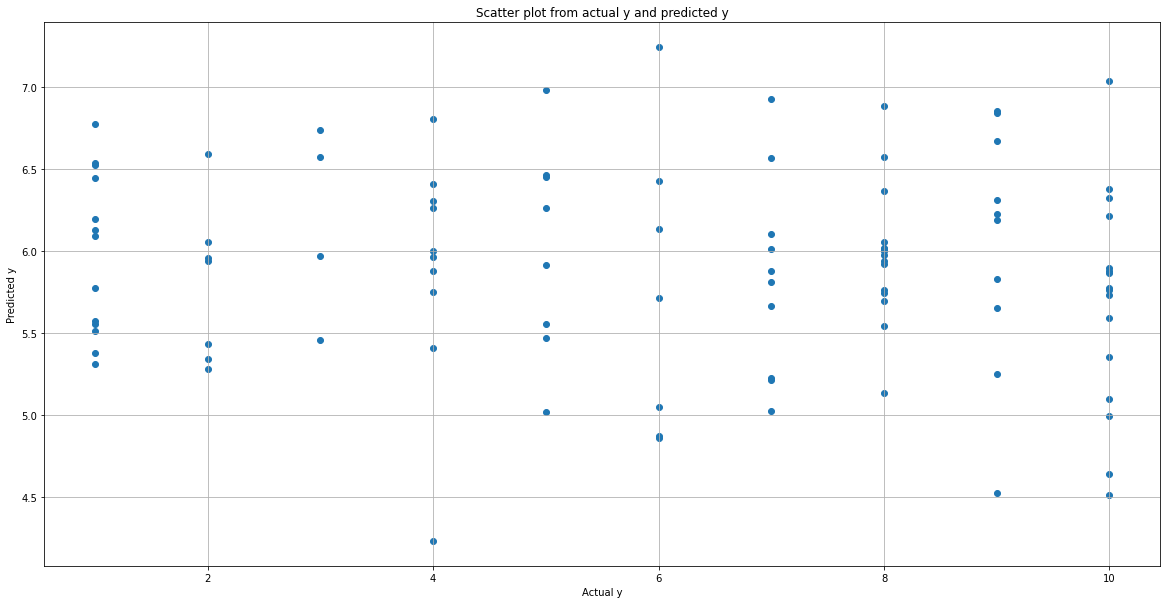

Scaling profit : 1.2657029234429782


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from math import sqrt
from matplotlib.colors import ListedColormap
from random import uniform
from random import randint
from sklearn.metrics import mean_squared_error

def build_scaling(arr):
    mean = np.mean(arr, axis = 0)
    stand_div = np.std(arr, axis = 0)
    return mean, stand_div

def get_data(points_num, point_dim):
    x = []
    y = []

    for i in range(points_num):
        gen = [np.array([uniform(0.1, 1) for _ in range(point_dim)]), randint(1, 10)]
        x.append(gen[0])
        y.append(gen[1])
    return x, y

def create_batches(points_num, batch_size, x, y, normalize):
    out = []
    batch = []

    mean, stand_div = build_scaling(np.array(x))

    for i in range(points_num):

        if normalize:
            batch.append([x[i], y[i]])
        else:
            batch.append([(x[i] - mean) / stand_div, y[i]])

        if len(batch) == batch_size:
            out.append(batch)
            batch = []

    if len(batch) != 0:
        for i in range(batch_size - len(batch)):
            batch.append(out[0][i])
        out.append(batch)

    if not normalize:
        return out
    else:
        return mean, stand_div, out

def sgd1(data, learning_rate, n_iter, butch_size, step, points_dim):
    w = np.zeros(points_dim)
    b = 0
    cur_iter = 0
    while cur_iter < n_iter:
        temp = data[cur_iter % len(data)]

        w_gradient = np.zeros(points_dim)
        b_gradient = 0
        for i in range(butch_size):
            prediction = np.dot(w, temp[i][0]) + b
            w_gradient = w_gradient + (-2) * temp[i][0] * (temp[i][1] - prediction)
            b_gradient = b_gradient + (-2) * (temp[i][1] - prediction)

        w = w - learning_rate * (w_gradient / butch_size)
        b = b - learning_rate * (b_gradient / butch_size)
        cur_iter = cur_iter + 1
        learning_rate = learning_rate / step

    return w, b # a x + b

def launch(x_, values_, n_iter, butch_size, points_num, points_dim, learning_rate, step):
    data = create_batches(points_num, butch_size, x, values, False)
    w, b = sgd1(data, learning_rate, n_iter, butch_size, step, points_dim)
    y_pred = []
    for i in range(len(x_)):
        y = (np.dot(w, x_[i]) + b).item()
        y_pred.append(y)

    print('Mean Squared Error :', mean_squared_error(values_, y_pred))
    # plt.scatter(values, y_pred)
    # plt.grid()
    # plt.xlabel('Actual y')
    # plt.ylabel('Predicted y')
    # plt.title('Scatter plot from actual y and predicted y')
    # plt.show()

def launch2(n_iter, butch_size, points_num, points_dim, learning_rate, step):
    x, values = get_data(points_num, points_dim)
    data = create_batches(points_num, butch_size, x, values, False)
    w, b = sgd1(data, learning_rate, n_iter, butch_size, step, points_dim)

    y_pred = []
    for i in range(len(x)):
        y = (np.dot(w, x[i]) + b).item()
        y_pred.append(y)

    without_norm = mean_squared_error(values, y_pred)
    print('Mean Squared Error :', without_norm)

    plt.scatter(values, y_pred)
    plt.grid()
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Scatter plot from actual y and predicted y')
    plt.show()

    mean, stand_div, data = create_batches(points_num, butch_size, x, values, True)
    w, b = sgd1(data, learning_rate, n_iter, butch_size, step, points_dim)

    y_pred = []
    for i in range(len(x)):
        y = (np.dot(w, x[i]) + b).item()
        y_pred.append(y)

    with_norm = mean_squared_error(values, y_pred)
    print('Mean Squared Error :', with_norm)

    plt.scatter(values, y_pred)
    plt.grid()
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Scatter plot from actual y and predicted y')
    plt.show()

    print('Scaling profit :', without_norm - with_norm)

p_num = 50
p_dim = 12

x, values = get_data(p_num, p_dim)

lr = 0.001
div_by = 1
it = 1000

for i in range(1, p_num + 1):
    launch(x, values, it, i, p_num, p_dim, lr, div_by)

launch2(1000, 10, 100, 12, 0.001, 1)

f = 5 * (y - x) ^ 2 + (1 - x) ^ 2:
Стартовая точка: [0 0]
step                          	 Ответ : [0.99999505 0.99999406]. Количество операций : 132. Время : 118 миллисекунд. Память : 2658.528 KB
step_with_momentum            	 Ответ : [1.00000036 1.00000061]. Количество операций : 28. Время : 21 миллисекунд. Память : 25.17 KB
step_nesterov                 	 Ответ : [0.99999661 0.99999608]. Количество операций : 46. Время : 76 миллисекунд. Память : 35.964 KB
step_ada                      	 Ответ : [0.99999505 0.99999406]. Количество операций : 132. Время : 107 миллисекунд. Память : 80.022 KB
step_RMSProp                  	 Ответ : [0.99999505 0.99999406]. Количество операций : 132. Время : 102 миллисекунд. Память : 76.89 KB
step_adam                     	 Ответ : [1.00000407 1.00000392]. Количество операций : 113. Время : 79 миллисекунд. Память : 59.963 KB


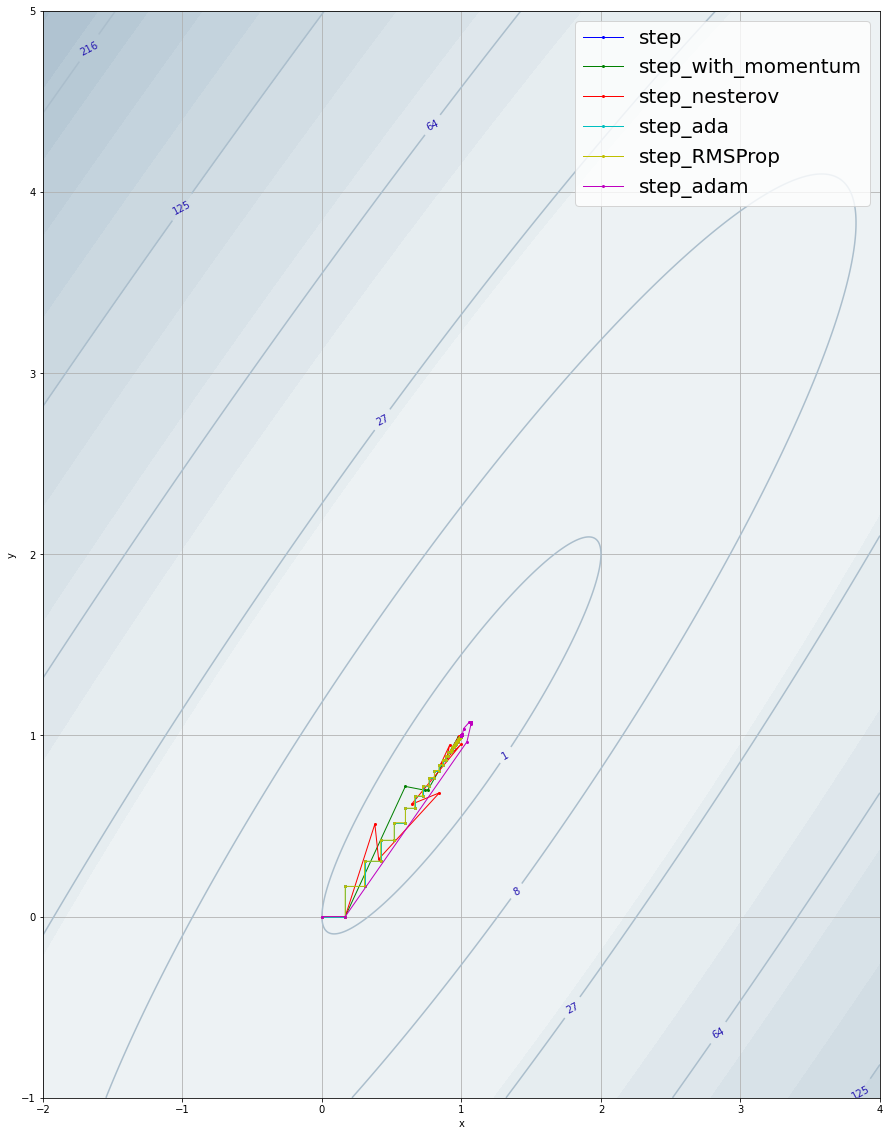

Стартовая точка: [-1  1]
step                          	 Ответ : [0.9999968  0.99999645]. Количество операций : 8. Время : 11 миллисекунд. Память : 17.523 KB
step_with_momentum            	 Ответ : [0.99999867 0.99999877]. Количество операций : 25. Время : 20 миллисекунд. Память : 23.271 KB
step_nesterov                 	 Ответ : [0.99999482 0.99999452]. Количество операций : 59. Время : 95 миллисекунд. Память : 35.492 KB
step_ada                      	 Ответ : [0.99999307 0.99999241]. Количество операций : 266. Время : 203 миллисекунд. Память : 114.504 KB
step_RMSProp                  	 Ответ : [0.9999957  0.99999485]. Количество операций : 132. Время : 113 миллисекунд. Память : 74.914 KB
step_adam                     	 Ответ : [0.99999804 0.99999836]. Количество операций : 150. Время : 141 миллисекунд. Память : 75.063 KB


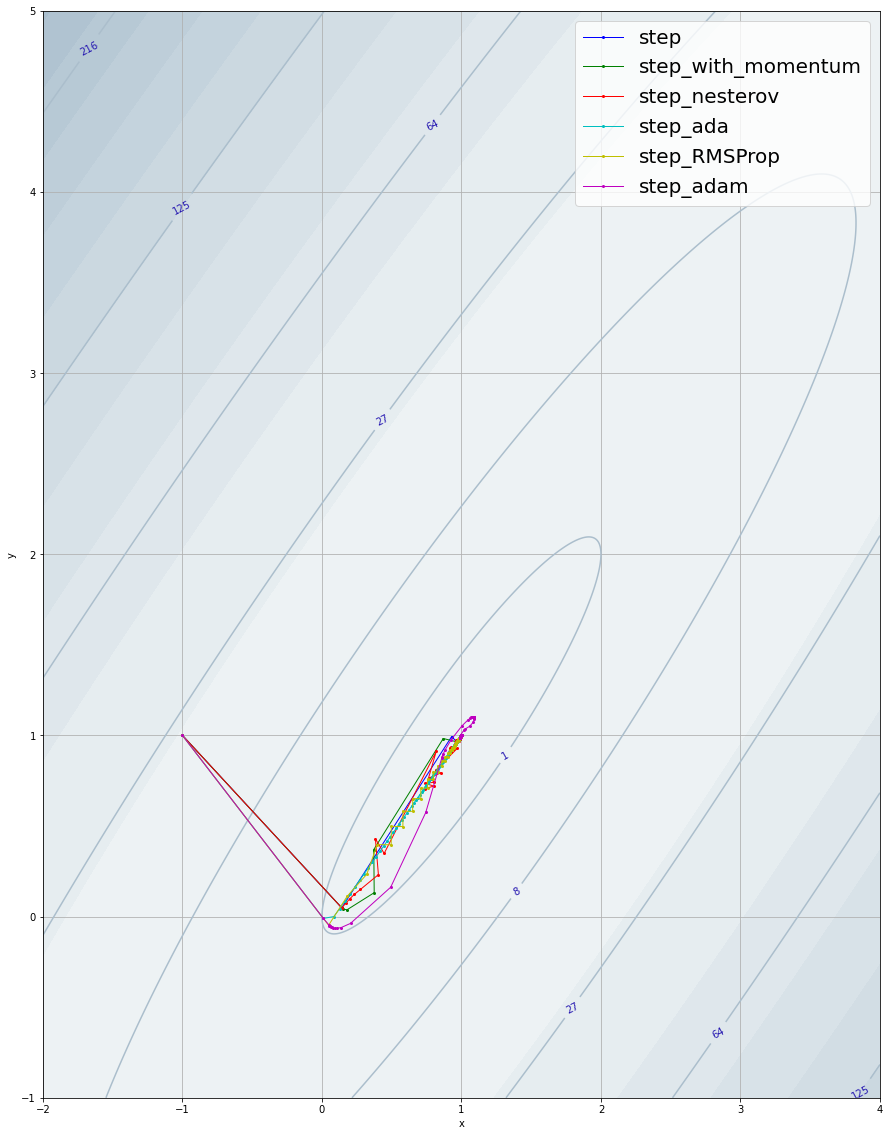

Стартовая точка: [2 3]
step                          	 Ответ : [1.00000273 1.00000297]. Количество операций : 24. Время : 20 миллисекунд. Память : 22.74 KB
step_with_momentum            	 Ответ : [1.00000426 1.00000421]. Количество операций : 29. Время : 26 миллисекунд. Память : 23.139 KB
step_nesterov                 	 Ответ : [1.00000438 1.00000504]. Количество операций : 57. Время : 95 миллисекунд. Память : 27.746 KB
step_ada                      	 Ответ : [1.00000545 1.00000563]. Количество операций : 140. Время : 111 миллисекунд. Память : 72.114 KB
step_RMSProp                  	 Ответ : [1.00000558 1.00000595]. Количество операций : 106. Время : 74 миллисекунд. Память : 69.288 KB
step_adam                     	 Ответ : [0.99999839 0.99999876]. Количество операций : 94. Время : 69 миллисекунд. Память : 65.175 KB


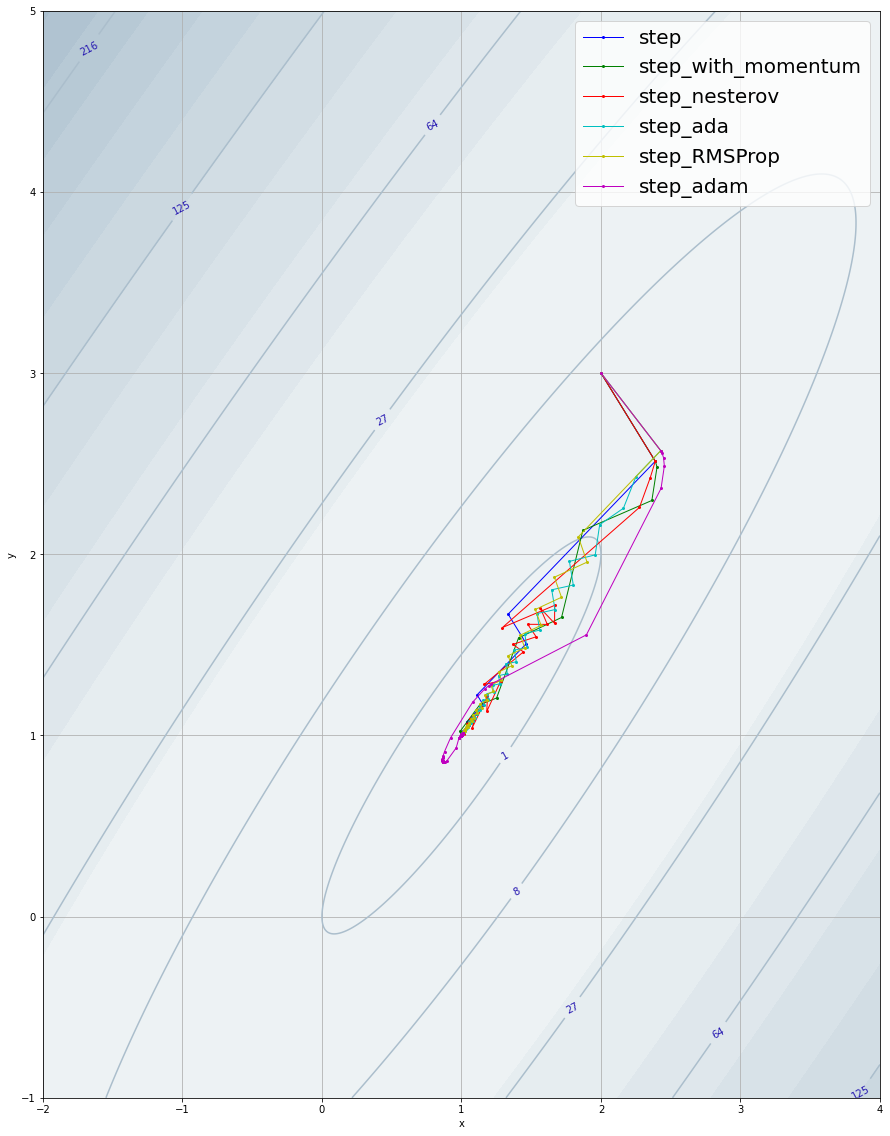

Стартовая точка: [4 1]
step                          	 Ответ : [1.0000048  1.00000533]. Количество операций : 8. Время : 7 миллисекунд. Память : 10.555 KB
step_with_momentum            	 Ответ : [1.000002   1.00000184]. Количество операций : 25. Время : 18 миллисекунд. Память : 20.291 KB
step_nesterov                 	 Ответ : [1.00000445 1.00000513]. Количество операций : 61. Время : 102 миллисекунд. Память : 36.939 KB
step_ada                      	 Ответ : [1.00000696 1.00000761]. Количество операций : 448. Время : 359 миллисекунд. Память : 120.252 KB
step_RMSProp                  	 Ответ : [1.00000488 1.00000574]. Количество операций : 130. Время : 108 миллисекунд. Память : 82.231 KB
step_adam                     	 Ответ : [0.99999597 0.99999512]. Количество операций : 159. Время : 127 миллисекунд. Память : 73.299 KB


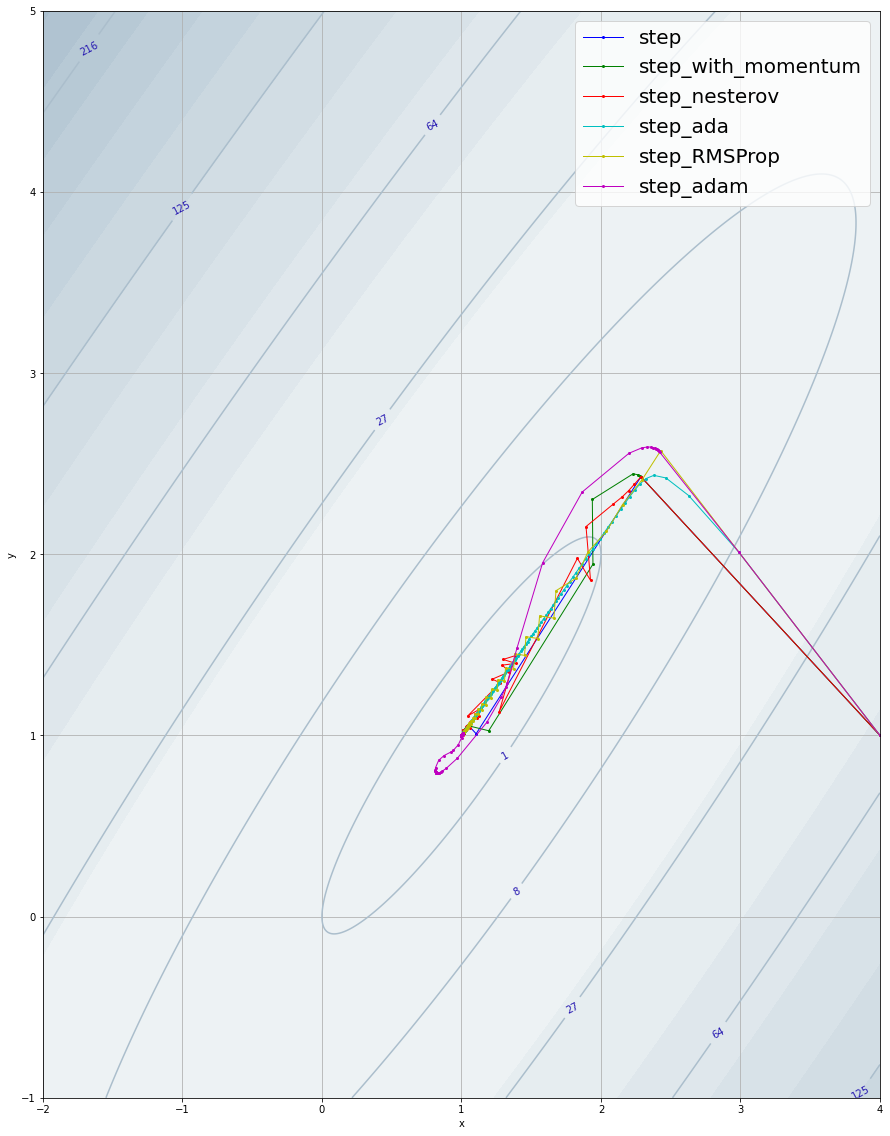

Стартовая точка: [3 5]
step                          	 Ответ : [1.00000546 1.00000595]. Количество операций : 24. Время : 31 миллисекунд. Память : 22.515 KB
step_with_momentum            	 Ответ : [1.00000515 1.00000537]. Количество операций : 34. Время : 35 миллисекунд. Память : 27.291 KB
step_nesterov                 	 Ответ : [1.00000429 1.00000456]. Количество операций : 59. Время : 115 миллисекунд. Память : 31.312 KB
step_ada                      	 Ответ : [1.00000679 1.00000759]. Количество операций : 268. Время : 208 миллисекунд. Память : 94.506 KB
step_RMSProp                  	 Ответ : [1.00000571 1.00000669]. Количество операций : 117. Время : 109 миллисекунд. Память : 65.907 KB
step_adam                     	 Ответ : [1.0000016  1.00000219]. Количество операций : 158. Время : 125 миллисекунд. Память : 81.744 KB


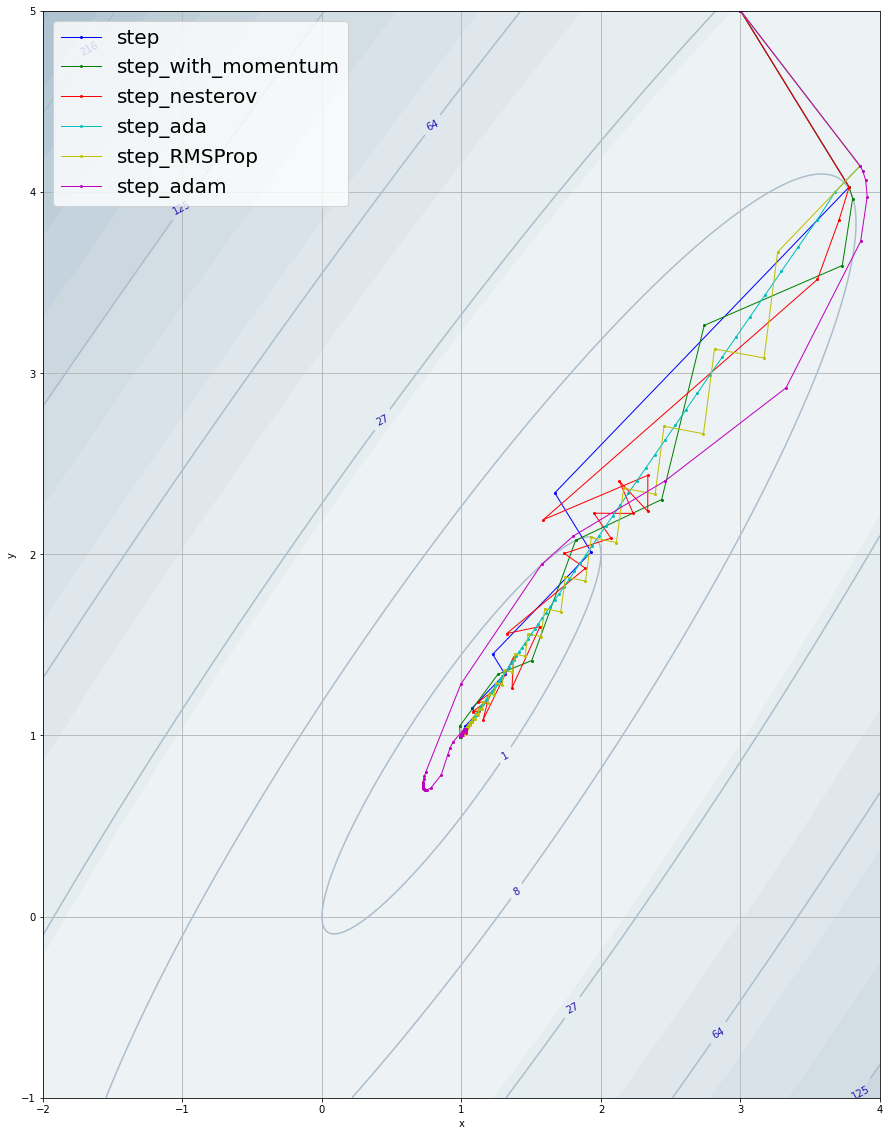

f = (100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2):
Стартовая точка: [0 0]
step                          	 Ответ : [0.99999046 0.99998088]. Количество операций : 9496. Время : 8698 миллисекунд. Память : 1696.906 KB
step_with_momentum            	 Ответ : [0.99999359 0.99998716]. Количество операций : 507. Время : 371 миллисекунд. Память : 125.134 KB
step_nesterov                 	 Ответ : [0.99998922 0.99997839]. Количество операций : 1051. Время : 2273 миллисекунд. Память : 217.675 KB
step_ada                      	 Ответ : [0.99999005 0.99998006]. Количество операций : 8138. Время : 6545 миллисекунд. Память : 1493.195 KB
step_RMSProp                  	 Ответ : [0.99998923 0.99997843]. Количество операций : 3100. Время : 2444 миллисекунд. Память : 557.762 KB
step_adam                     	 Ответ : [0.9999911  0.99998216]. Количество операций : 450. Время : 359 миллисекунд. Память : 113.093 KB


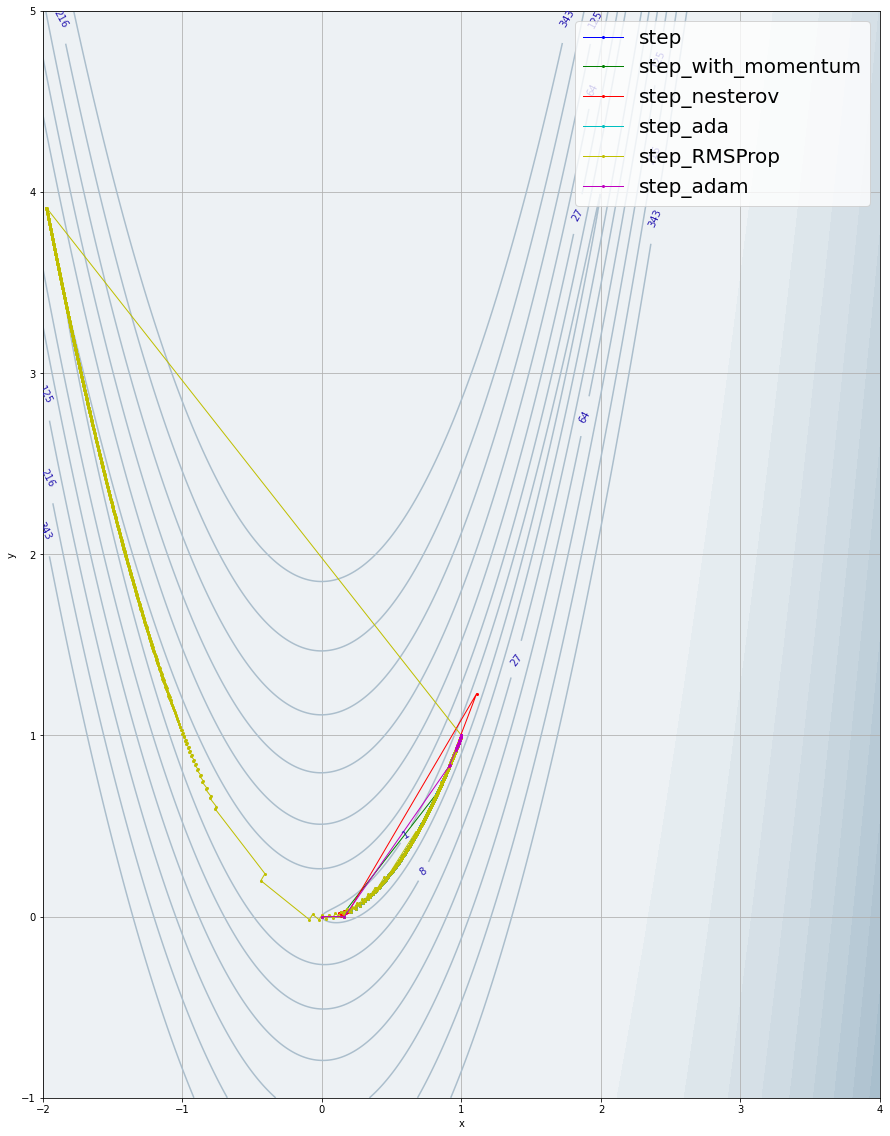

Стартовая точка: [-1  1]
step                          	 Ответ : [1.00000001 1.00000001]. Количество операций : 1. Время : 3 миллисекунд. Память : 6.579 KB
step_with_momentum            	 Ответ : [1.00000186 1.00000372]. Количество операций : 11. Время : 9 миллисекунд. Память : 10.179 KB
step_nesterov                 	 Ответ : [0.99998893 0.99997782]. Количество операций : 973. Время : 1750 миллисекунд. Память : 211.202 KB
step_ada                      	 Ответ : [0.9999889  0.99997775]. Количество операций : 1523. Время : 1213 миллисекунд. Память : 326.779 KB
step_RMSProp                  	 Ответ : [0.99999948 0.99999896]. Количество операций : 5. Время : 4 миллисекунд. Память : 6.139 KB
step_adam                     	 Ответ : [1.00000789 1.00001584]. Количество операций : 105. Время : 85 миллисекунд. Память : 73.275 KB


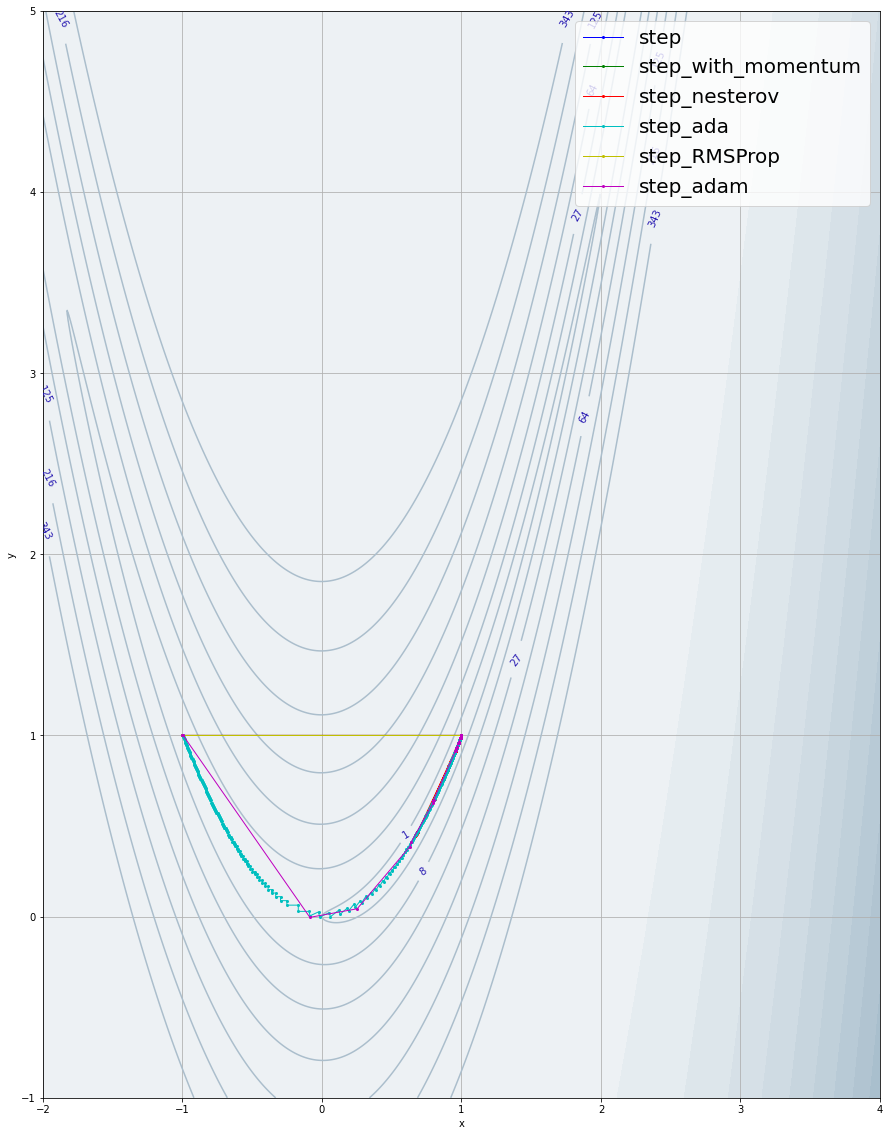

Стартовая точка: [2 3]
step                          	 Ответ : [1.0000081  1.00001623]. Количество операций : 1631. Время : 1308 миллисекунд. Память : 314.676 KB
step_with_momentum            	 Ответ : [1.00001005 1.00002014]. Количество операций : 4871. Время : 3762 миллисекунд. Память : 864.347 KB
step_nesterov                 	 Ответ : [1.00001094 1.00002193]. Количество операций : 917. Время : 1684 миллисекунд. Память : 211.626 KB
step_ada                      	 Ответ : [1.00000996 1.00001996]. Количество операций : 10698. Время : 9687 миллисекунд. Память : 1950.971 KB
step_RMSProp                  	 Ответ : [1.00000363 1.00000727]. Количество операций : 6140. Время : 4743 миллисекунд. Память : 1099.651 KB
step_adam                     	 Ответ : [1.00000763 1.00001531]. Количество операций : 558. Время : 517 миллисекунд. Память : 147.907 KB


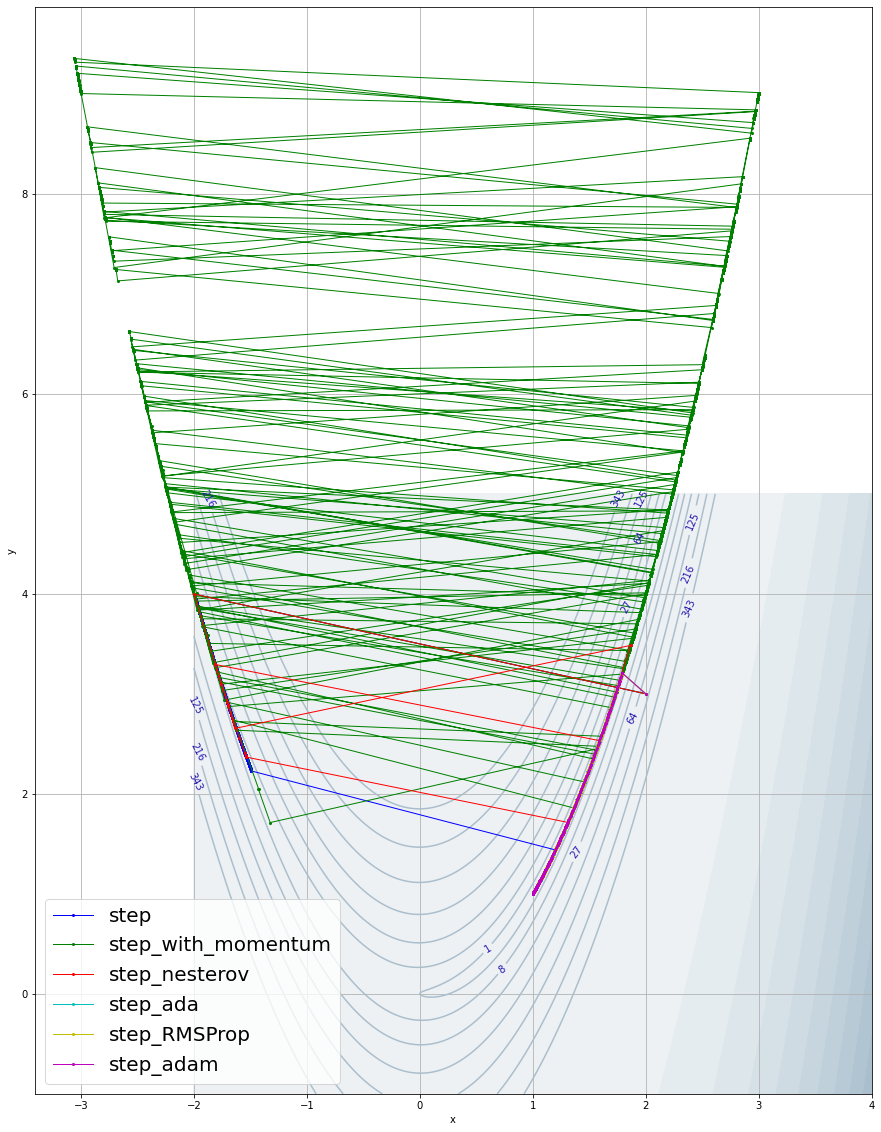

Стартовая точка: [4 1]
step                          	 Ответ : [1.00000821 1.00001645]. Количество операций : 69. Время : 101 миллисекунд. Память : 57.08 KB
step_with_momentum            	 Ответ : [1.00000922 1.00001848]. Количество операций : 1358. Время : 1338 миллисекунд. Память : 259.676 KB
step_nesterov                 	 Ответ : [0.99999149 0.99998294]. Количество операций : 931. Время : 1606 миллисекунд. Память : 179.563 KB
[1.49838426 2.24607164]
step_ada                      	 Ответ : .... Количество операций : 20000. Время : 14902 миллисекунд. Память : 3566.091 KB
[1.00000022 0.99999978]
step_RMSProp                  	 Ответ : .... Количество операций : 20000. Время : 15629 миллисекунд. Память : 3562.939 KB
step_adam                     	 Ответ : [1.00000706 1.00001416]. Количество операций : 1029. Время : 773 миллисекунд. Память : 217.475 KB


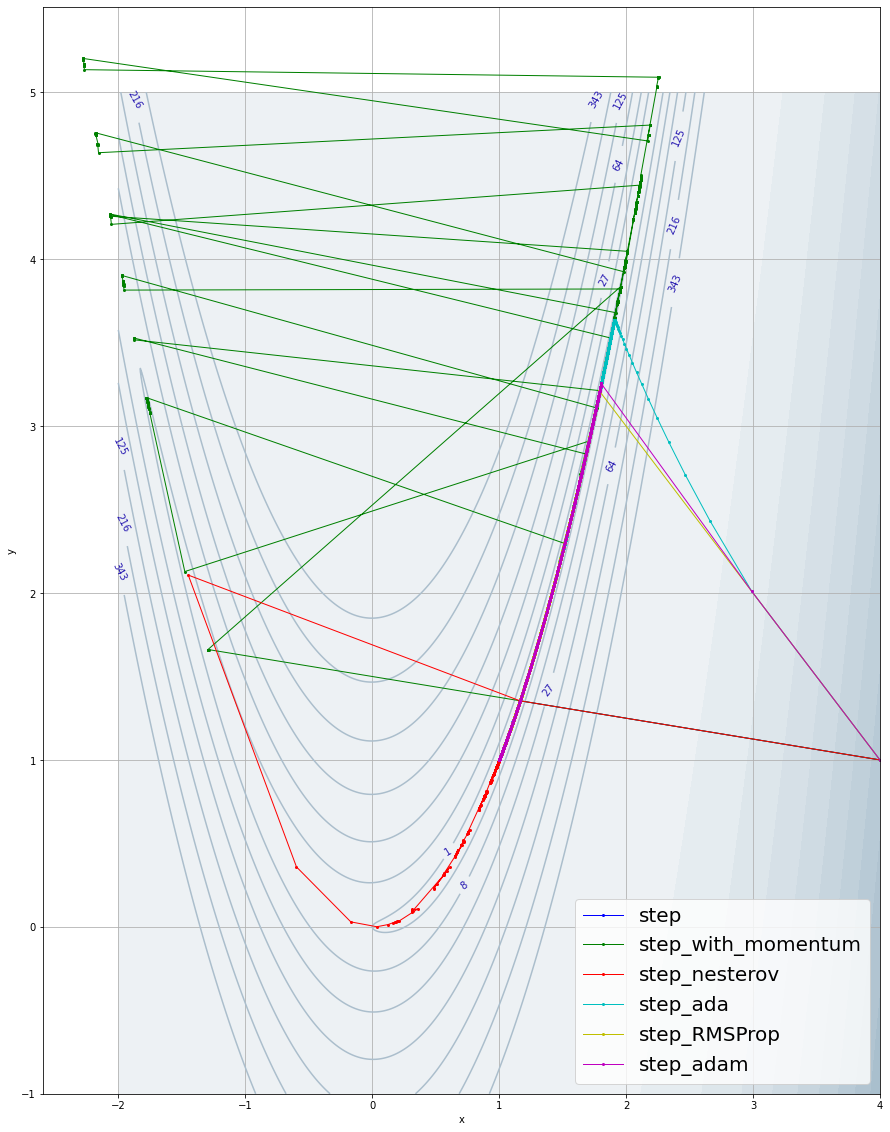

Стартовая точка: [3 5]
step                          	 Ответ : [1.00000818 1.0000164 ]. Количество операций : 3045. Время : 2295 миллисекунд. Память : 576.691 KB
step_with_momentum            	 Ответ : [1.00001039 1.00002081]. Количество операций : 1306. Время : 886 миллисекунд. Память : 263.659 KB
step_nesterov                 	 Ответ : [1.00000917 1.00001838]. Количество операций : 1218. Время : 2350 миллисекунд. Память : 227.395 KB
[1.03744878 1.07637541]
step_ada                      	 Ответ : .... Количество операций : 20000. Время : 18952 миллисекунд. Память : 3558.827 KB
step_RMSProp                  	 Ответ : [0.99999131 0.99998259]. Количество операций : 13944. Время : 9863 миллисекунд. Память : 2506.435 KB
step_adam                     	 Ответ : [1.00000818 1.0000164 ]. Количество операций : 774. Время : 684 миллисекунд. Память : 165.603 KB


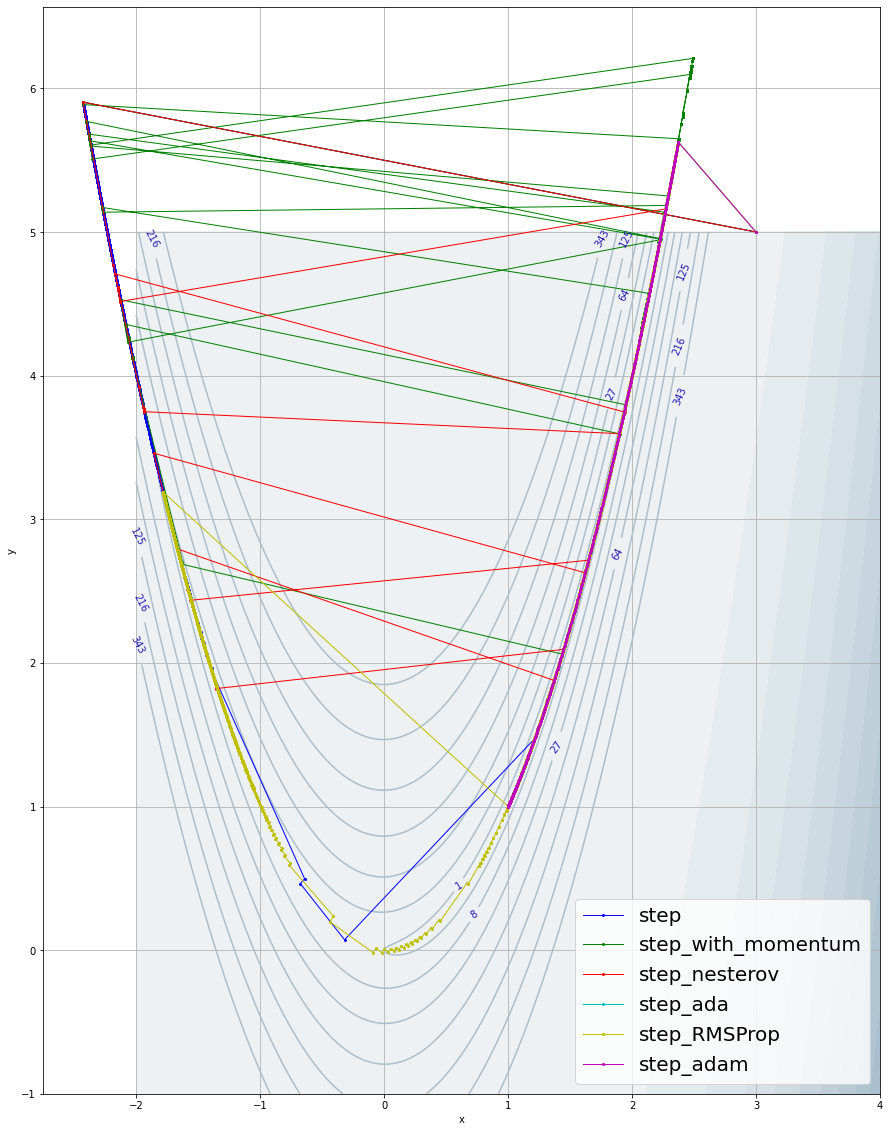

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import tracemalloc
from numpy import linalg as LA
from math import sqrt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = (20, 10)

phi = (sqrt(5) - 1) / 2

eps=1e-6

def golden_search(f):
    def step(old_interval, f_x1=None, f_x2=None, cnt = 0):
        a, b = old_interval

        if b - a < eps:
            mid = (a + b) / 2
            return mid

        t = (b - a) * phi
        x1, x2 = b - t, a + t

        f_x1 = f_x1 if f_x1 else f(x1)
        f_x2 = f_x2 if f_x2 else f(x2)

        if f_x1 < f_x2:
            new_interval = (a, x2)
            args = [None, f_x1]
        else:
            new_interval = (x1, b)
            args = [f_x2, None]

        return step(new_interval, *args, cnt + 1)

    return step

def common_gd(f, derivative, x0, method, step_method, iteration=20_000, eps=1e-5):
    xk = x0
    p_i = np.zeros(len(x0))
    v_i = np.zeros(len(x0))
    trace = [xk]
    for i in range(iteration):
        x_next, p_i, v_i = step_method(f, derivative, method, xk, p_i, v_i)
        trace.append(x_next)

        if LA.norm(derivative(*x_next)) < eps:
            return i, np.asarray(trace), x_next

        xk = x_next
    return iteration, np.asarray(trace), None

def plot_graph(f, trace):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-2:2:1000j, -1:4:1000j]
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels=10, cmap=cmap)
    cs = ax.contour(x, y, z, levels=levels, colors="#ABBECC")
    ax.clabel(cs, colors="#2618B1")

    ax.plot(trace[:, 0], trace[:, 1], '-og', linewidth=.5, ms=1.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(10)
    fig.set_figheight(12)

    plt.show()


def plot_all_graph(f, trace, step_representation):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-2:4:1000j, -1:5:1000j]
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels=10, cmap=cmap)
    cs = ax.contour(x, y, z, levels=levels, colors="#ABBECC")
    ax.clabel(cs, colors="#2618B1")
    color = ["b", "g", "r", "c", "y", "m"]
    for i in range(len(trace)):
        ax.plot(trace[i][:, 0], trace[i][:, 1], '-o' + color[i], linewidth=1., ms=2, label=step_representation[i])
    # ax.legend(['1', "2"])
    #   b g r c m y
    ax.legend(prop={'size': 20})
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(15)
    fig.set_figheight(20)

    plt.show()



def step(f, derivative, method, x, _, __):
   pk = -derivative(*x)
   g = lambda a: f(*(x + a * pk))
   ak = method(g)((0, 1.01))
   x_next = x + ak * pk
   return x_next, _, __

def step_with_momentum(f, derivative, method, x, p_prev, _):
    beta = 0.5
    pk = beta * p_prev + (1 - beta) * derivative(*x)
    g = lambda a: f(*(x - a * pk))
    ak = method(g)((0, 1.01))
    return x - ak * pk, pk, _

def step_nesterov(f, derivative, method, x, p_prev, _):
    beta = 0.3
    g = lambda a: f(*(x - beta * p_prev - a * derivative(*(x - beta * p_prev))))
    ak = method(g)((0, 1.01))
    return x - beta * p_prev - ak * derivative(*(x - beta * p_prev)), beta * p_prev - ak * derivative(*(x - beta * p_prev)), _

def step_ada(f, derivative, method, x, p_prev, _):
    d = derivative(*x)
    pk = p_prev + np.square(d)
    pt =  d / (np.sqrt(pk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak = method(g)((0, 1.01))
    return x - ak * pt, pk, _

def step_RMSProp(f, derivative, method, x, p_prev, _):
    gamma = 0.9
    d = derivative(*x)
    pk = gamma * p_prev + (1 - gamma) * np.square(d)
    pt = d / (np.sqrt(pk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak = method(g)((0, 1.01))
    return x - ak * pt, pk, _

def step_adam(f, derivative, method, x, p_prev, v_prev):
    beta1 = 0.9
    beta2 = 0.99
    d = derivative(*x)
    pk = beta1 * p_prev + (1 - beta1) * d
    vk = beta2 * v_prev + (1 - beta2) * np.square(d)
    pt = pk / (np.sqrt(vk) + 1e-8)
    g = lambda a: f(*(x - a * pt))
    ak = method(g)((0, 1.01))
    return x - ak * pt, pk, vk


representations = ["5 * (y - x) ^ 2 + (1 - x) ^ 2",
                   "(100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2)"]

fs = [lambda x, y: 5 * (y - x) ** 2 + (1 - x) ** 2,
      lambda x, y: 100 * (y - x ** 2) ** 2 + (1 - x) ** 2]

derivatives = [lambda x, y: np.array([-10 * (y - x) + 2 * x - 2, 10 * (y - x)]),
               lambda x, y: np.array([2 * (-1 + x + 200 * x ** 3 - 200 * x * y), 200 * (-x ** 2 + y)])]

starts = np.array([[0, 0], [-1, 1], [2, 3], [4, 1], [3, 5]])

steps = [step, step_with_momentum, step_nesterov, step_ada, step_RMSProp, step_adam]
step_representation = ["step", "step_with_momentum", "step_nesterov", "step_ada", "step_RMSProp", "step_adam"]

#
# for q in range(len(steps)):
#     print(f'current step is {step_representation[q]}')
#     for i, f in enumerate(fs):
#         print(f'f = {representations[i]}:')
#         for s in starts:
#             tracemalloc.start()
#             start = datetime.datetime.now()
#             oper, trace, x = common_gd(f, derivatives[i], s, golden_search, steps[q])
#             end = datetime.datetime.now()
#             _, memory = tracemalloc.get_traced_memory()
#             tracemalloc.stop()
#             time = (end - start) / 1000
#             memory /= 1000
#             if x is None:
#                 ans = "..."
#                 print(trace[-1])
#             else:
#                 ans = x
#             plot_graph(f, trace)
#             print(f'Стартовая точка: {s}\nОтвет : {ans}. Количество операций : {oper}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')
#

for i, f in enumerate(fs):
    print(f'f = {representations[i]}:')
    for s in starts:
        print("Стартовая точка:", s)
        tr = []
        for q in range(len(steps)):
            tracemalloc.start()
            start = datetime.datetime.now()
            oper, trace, x = common_gd(f, derivatives[i], s, golden_search, steps[q])
            end = datetime.datetime.now()
            _, memory = tracemalloc.get_traced_memory()
            tracemalloc.stop()
            time = (end - start) / 1000
            memory /= 1000
            if x is None:
                ans = "..."
                print(trace[-1])
            else:
                ans = x
            tr.append(trace)
            print(f'{step_representation[q].ljust(30, " ")}\t Ответ : {ans}. Количество операций : {oper}. Время : {time.microseconds} миллисекунд. Память : {memory} KB')
        plot_all_graph(f, tr, step_representation)